### Import necessary libraries

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read 'python logo.jpg' & 'opencv.png'

In [48]:
img1 = cv2.imread('python logo.jpg')
cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('opencv.png')
cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### View both the images

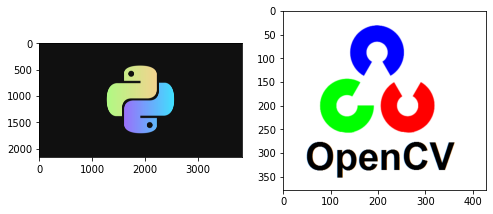

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()


### Print the shape of both the images

In [13]:
print(f"img1 shape: {img1.shape}\nimg2 shape: {img2.shape}")

img1 shape: (2160, 3840, 3)
img2 shape: (378, 428, 3)


### Set x and y offset to set the part where you want to paste the image

In [49]:
x_offset = 3840-428
y_offset = 2160-378

### Set the region of interest

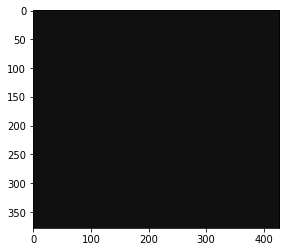

In [50]:
roi = img1[y_offset:2160,x_offset:3840]
plt.imshow(roi)

### Convert the smaller image into grayscale

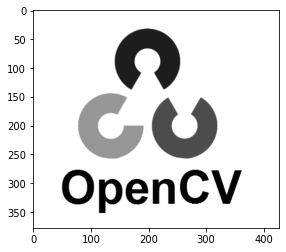

In [51]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap='gray')

In [122]:
ret,mask = cv2.threshold(img2_gray,150,255,cv2.THRESH_BINARY)


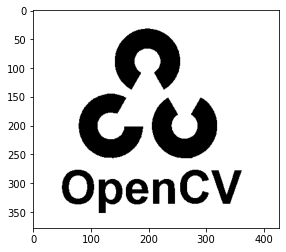

In [123]:
plt.imshow(mask,cmap='gray')

### Fetch the inverse of the image using 'bitwise_or'

Essentially just convert all black parts of the image to white and white parts to black

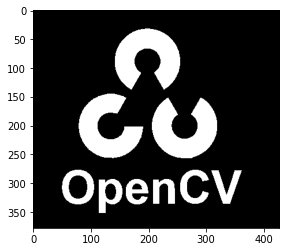

In [114]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')

### Paste the inverse mask on top of original image

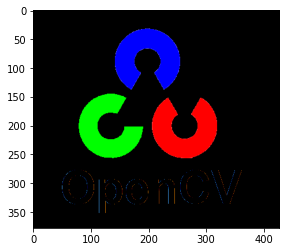

In [115]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

### Paste the mask on top of our region of interest

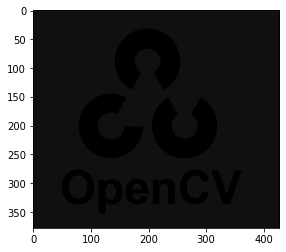

In [117]:
bg = cv2.bitwise_or(roi,roi,mask = mask)
plt.imshow(bg)

### Add our foreground & background image

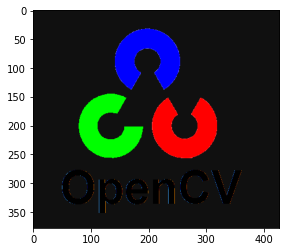

In [119]:
final_roi = cv2.add(bg,fg)
plt.imshow(final_roi)

### Paste the final roi on top of our original Image

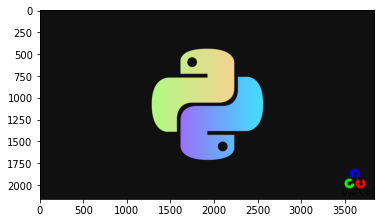

In [120]:
img1[y_offset:2160,x_offset:3840] = final_roi
plt.imshow(img1)